In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0001357.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

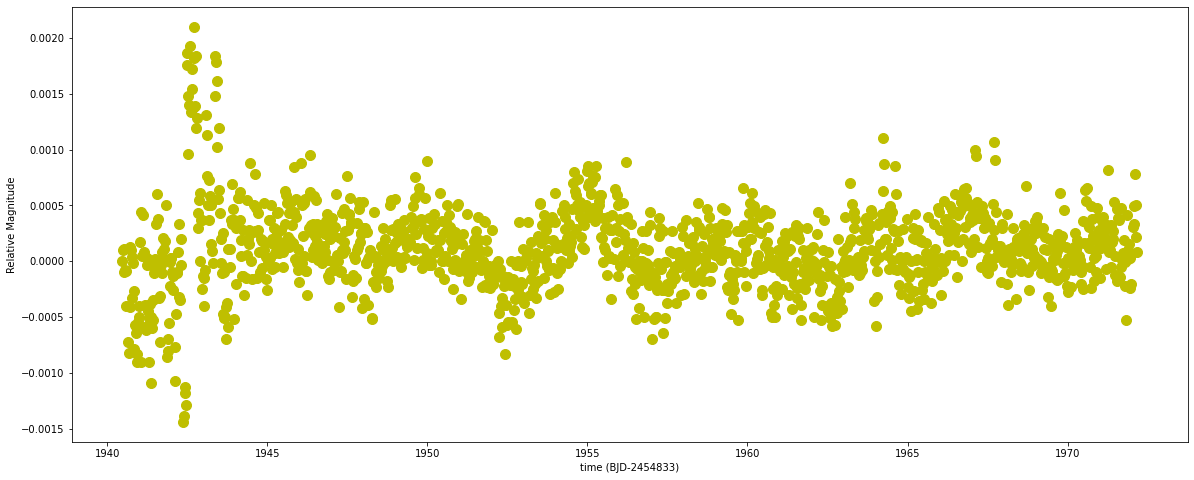

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0001357')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200820 11:08:10 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200820 11:08:10 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=data['col4']

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200820 11:08:14 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200820 11:08:14 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200820 11:08:17 nonphysical:216] spline fit done. nknots = 13,  chisq = 488.44087, reduced chisq = 0.36127
[I 200820 11:08:17 png:696] plotting phased LC with period 4.062765, epoch 1959.04991
[I 200820 11:08:17 nonphysical:216] spline fit done. nknots = 13,  chisq = 524.97254, reduced chisq = 0.38829
[I 200820 11:08:17 png:696] plotting phased LC with period 2.031382, epoch 1940.47756
[I 200820 11:08:17 nonphysical:216] spline fit done. nknots = 13,  chisq = 484.22353, reduced chisq = 0.35815
[I 200820 11:08:17 png:696] plotting phased LC with period 8.125530, epoch 1958.88646
[I 200820 11:08:17 nonphysical:216] spline fit done. nknots = 13,  chisq = 482.74260, reduced chisq = 0.35706
[I 200820 11:08:17 png:696] plotting phased LC with period 5.658851, epoch 1961.19524
[I 200820 11:08:18 nonphysical:216] spline fit done. nknots = 13,  chisq = 437.48996, reduced chisq = 0.32359
[I 200820 11:08:18 png:696] plotting phased LC with period 10.563189, epoch 1955.98516
[I 200820 11:08:18 

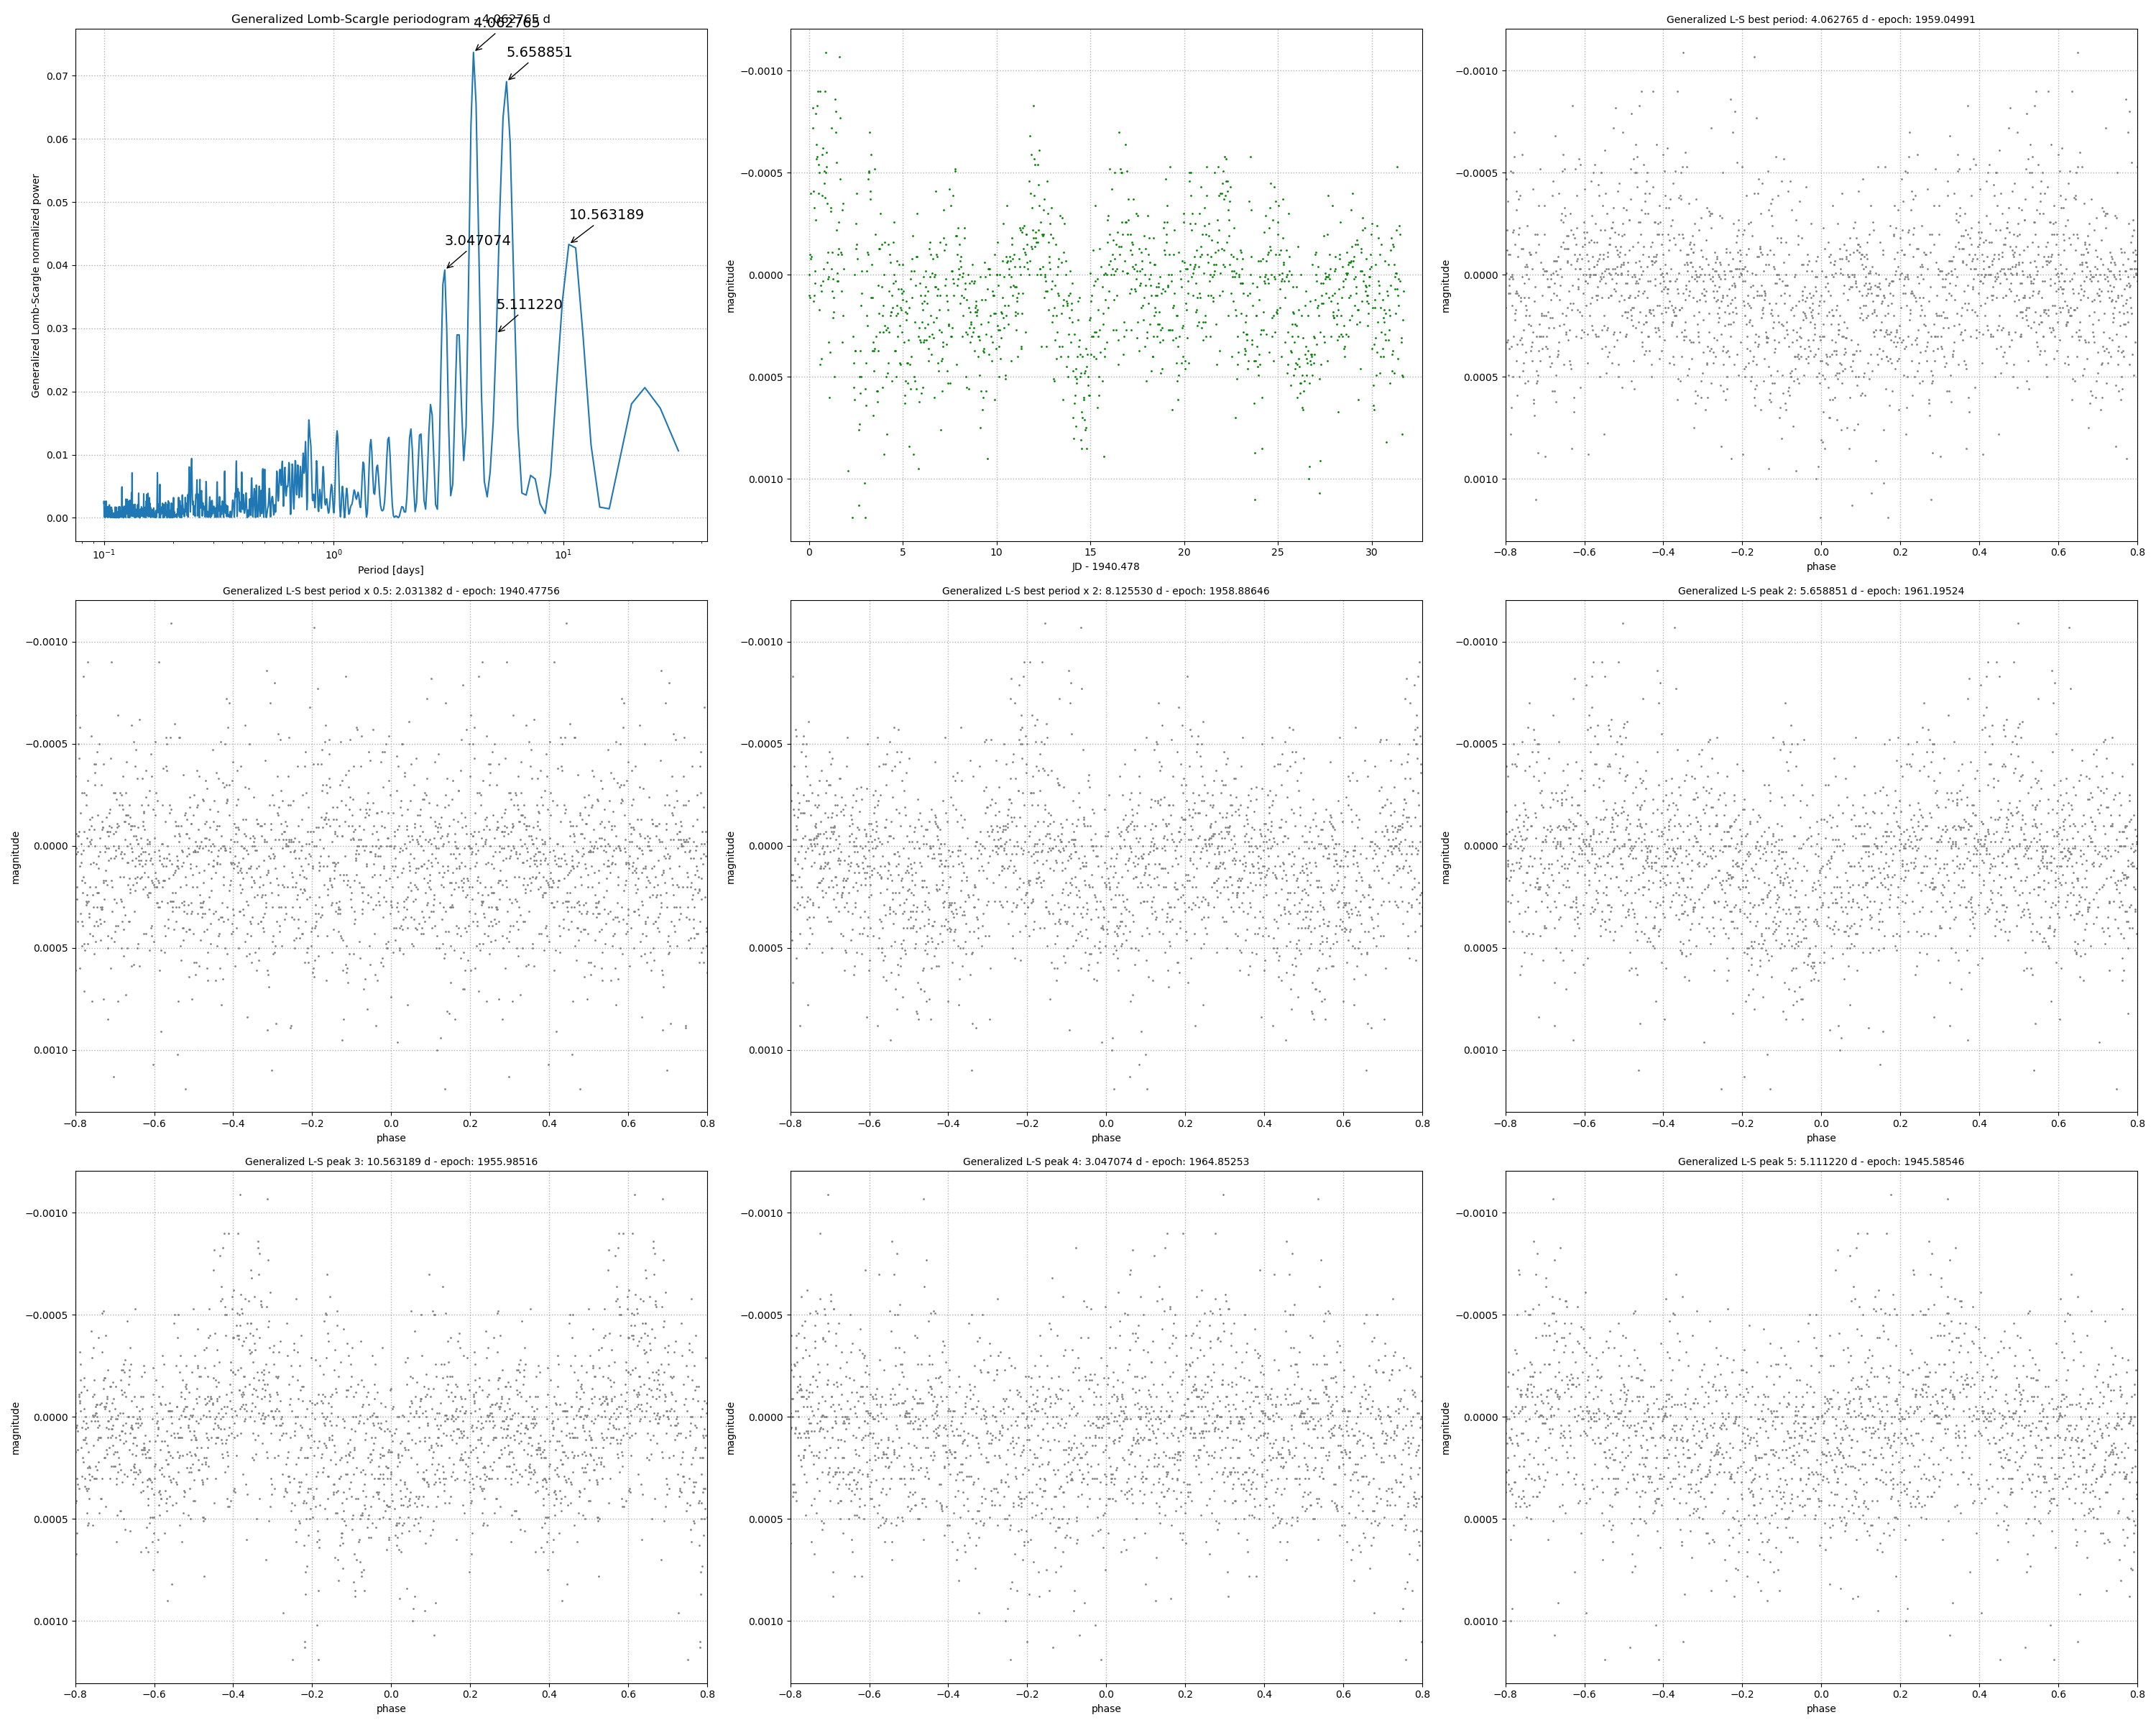

In [8]:
from IPython.display import Image
Image('0001357-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 4.062764817948706,
 'bestlspval': 0.07368356021660348,
 'nbestpeaks': 5,
 'nbestlspvals': [0.07368356021660348,
  0.06905830415045477,
  0.043282762835489735,
  0.039229319927786416,
  0.029140431986206937],
 'nbestperiods': [4.062764817948706,
  5.658850996428556,
  10.563188526666634,
  3.0470736134615293,
  5.1112202548386945],
 'lspvals': array([0.01059697, 0.01737006, 0.02061585, ..., 0.00205324, 0.00264287,
        0.00228621]),
 'omegas': array([ 0.198273  ,  0.2379276 ,  0.2775822 , ..., 62.73357791,
        62.77323251, 62.81288711]),
 'periods': array([31.68956558, 26.40797132, 22.63540399, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [4.062764817948706, 5.658850996428556, 10.563188526666634, 3.0470736134615293, 5.1112202548386945] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs,startp=0.1,endp=30)

[I 200820 11:09:09 abls:919] min P: 0.1, max P: 30, nfreq: 126336, minfreq: 0.03333333333333333, maxfreq: 10.0
[I 200820 11:09:09 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032096980886e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[I 200820 11:09:09 abls:980] using 6 workers...
[I 200820 11:09:09 abls:1090] worker 1: minfreq = 0.033333, nfreqs = 21056
[I 200820 11:09:09 abls:1090] worker 2: minfreq = 1.694448, nfreqs = 21056
[I 200820 11:09:09 abls:1090] worker 3: minfreq = 3.355563, nfreqs = 21056
[I 200820 11:09:09 abls:1090] worker 4: minfreq = 5.016677, nfreqs = 21056
[I 200820 11:09:09 abls:1090] worker 5: minfreq = 6.677792, nfreqs = 21056
[I 200820 11:09:09 abls:1090] worker 6: minfreq = 8.338906, nfreqs = 21056
[I 200820 11:09:09 abls:1092] running...


In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[I 200820 11:09:24 nonphysical:216] spline fit done. nknots = 13,  chisq = 455.44159, reduced chisq = 0.33687
[I 200820 11:09:24 png:696] plotting phased LC with period 10.160759, epoch 1954.94314
[I 200820 11:09:25 nonphysical:216] spline fit done. nknots = 13,  chisq = 496.81589, reduced chisq = 0.36747
[I 200820 11:09:25 png:696] plotting phased LC with period 5.080379, epoch 1950.63207
[I 200820 11:09:25 nonphysical:216] spline fit done. nknots = 13,  chisq = 413.86624, reduced chisq = 0.30611
[I 200820 11:09:25 png:696] plotting phased LC with period 20.321517, epoch 1955.18832
[I 200820 11:09:25 nonphysical:216] spline fit done. nknots = 13,  chisq = 413.99386, reduced chisq = 0.30621
[I 200820 11:09:25 png:696] plotting phased LC with period 20.264218, epoch 1955.20876
[I 200820 11:09:25 nonphysical:216] spline fit done. nknots = 13,  chisq = 456.67135, reduced chisq = 0.33777
[I 200820 11:09:25 png:696] plotting phased LC with period 30.000000, epoch 1955.47437
[I 200820 11:09:

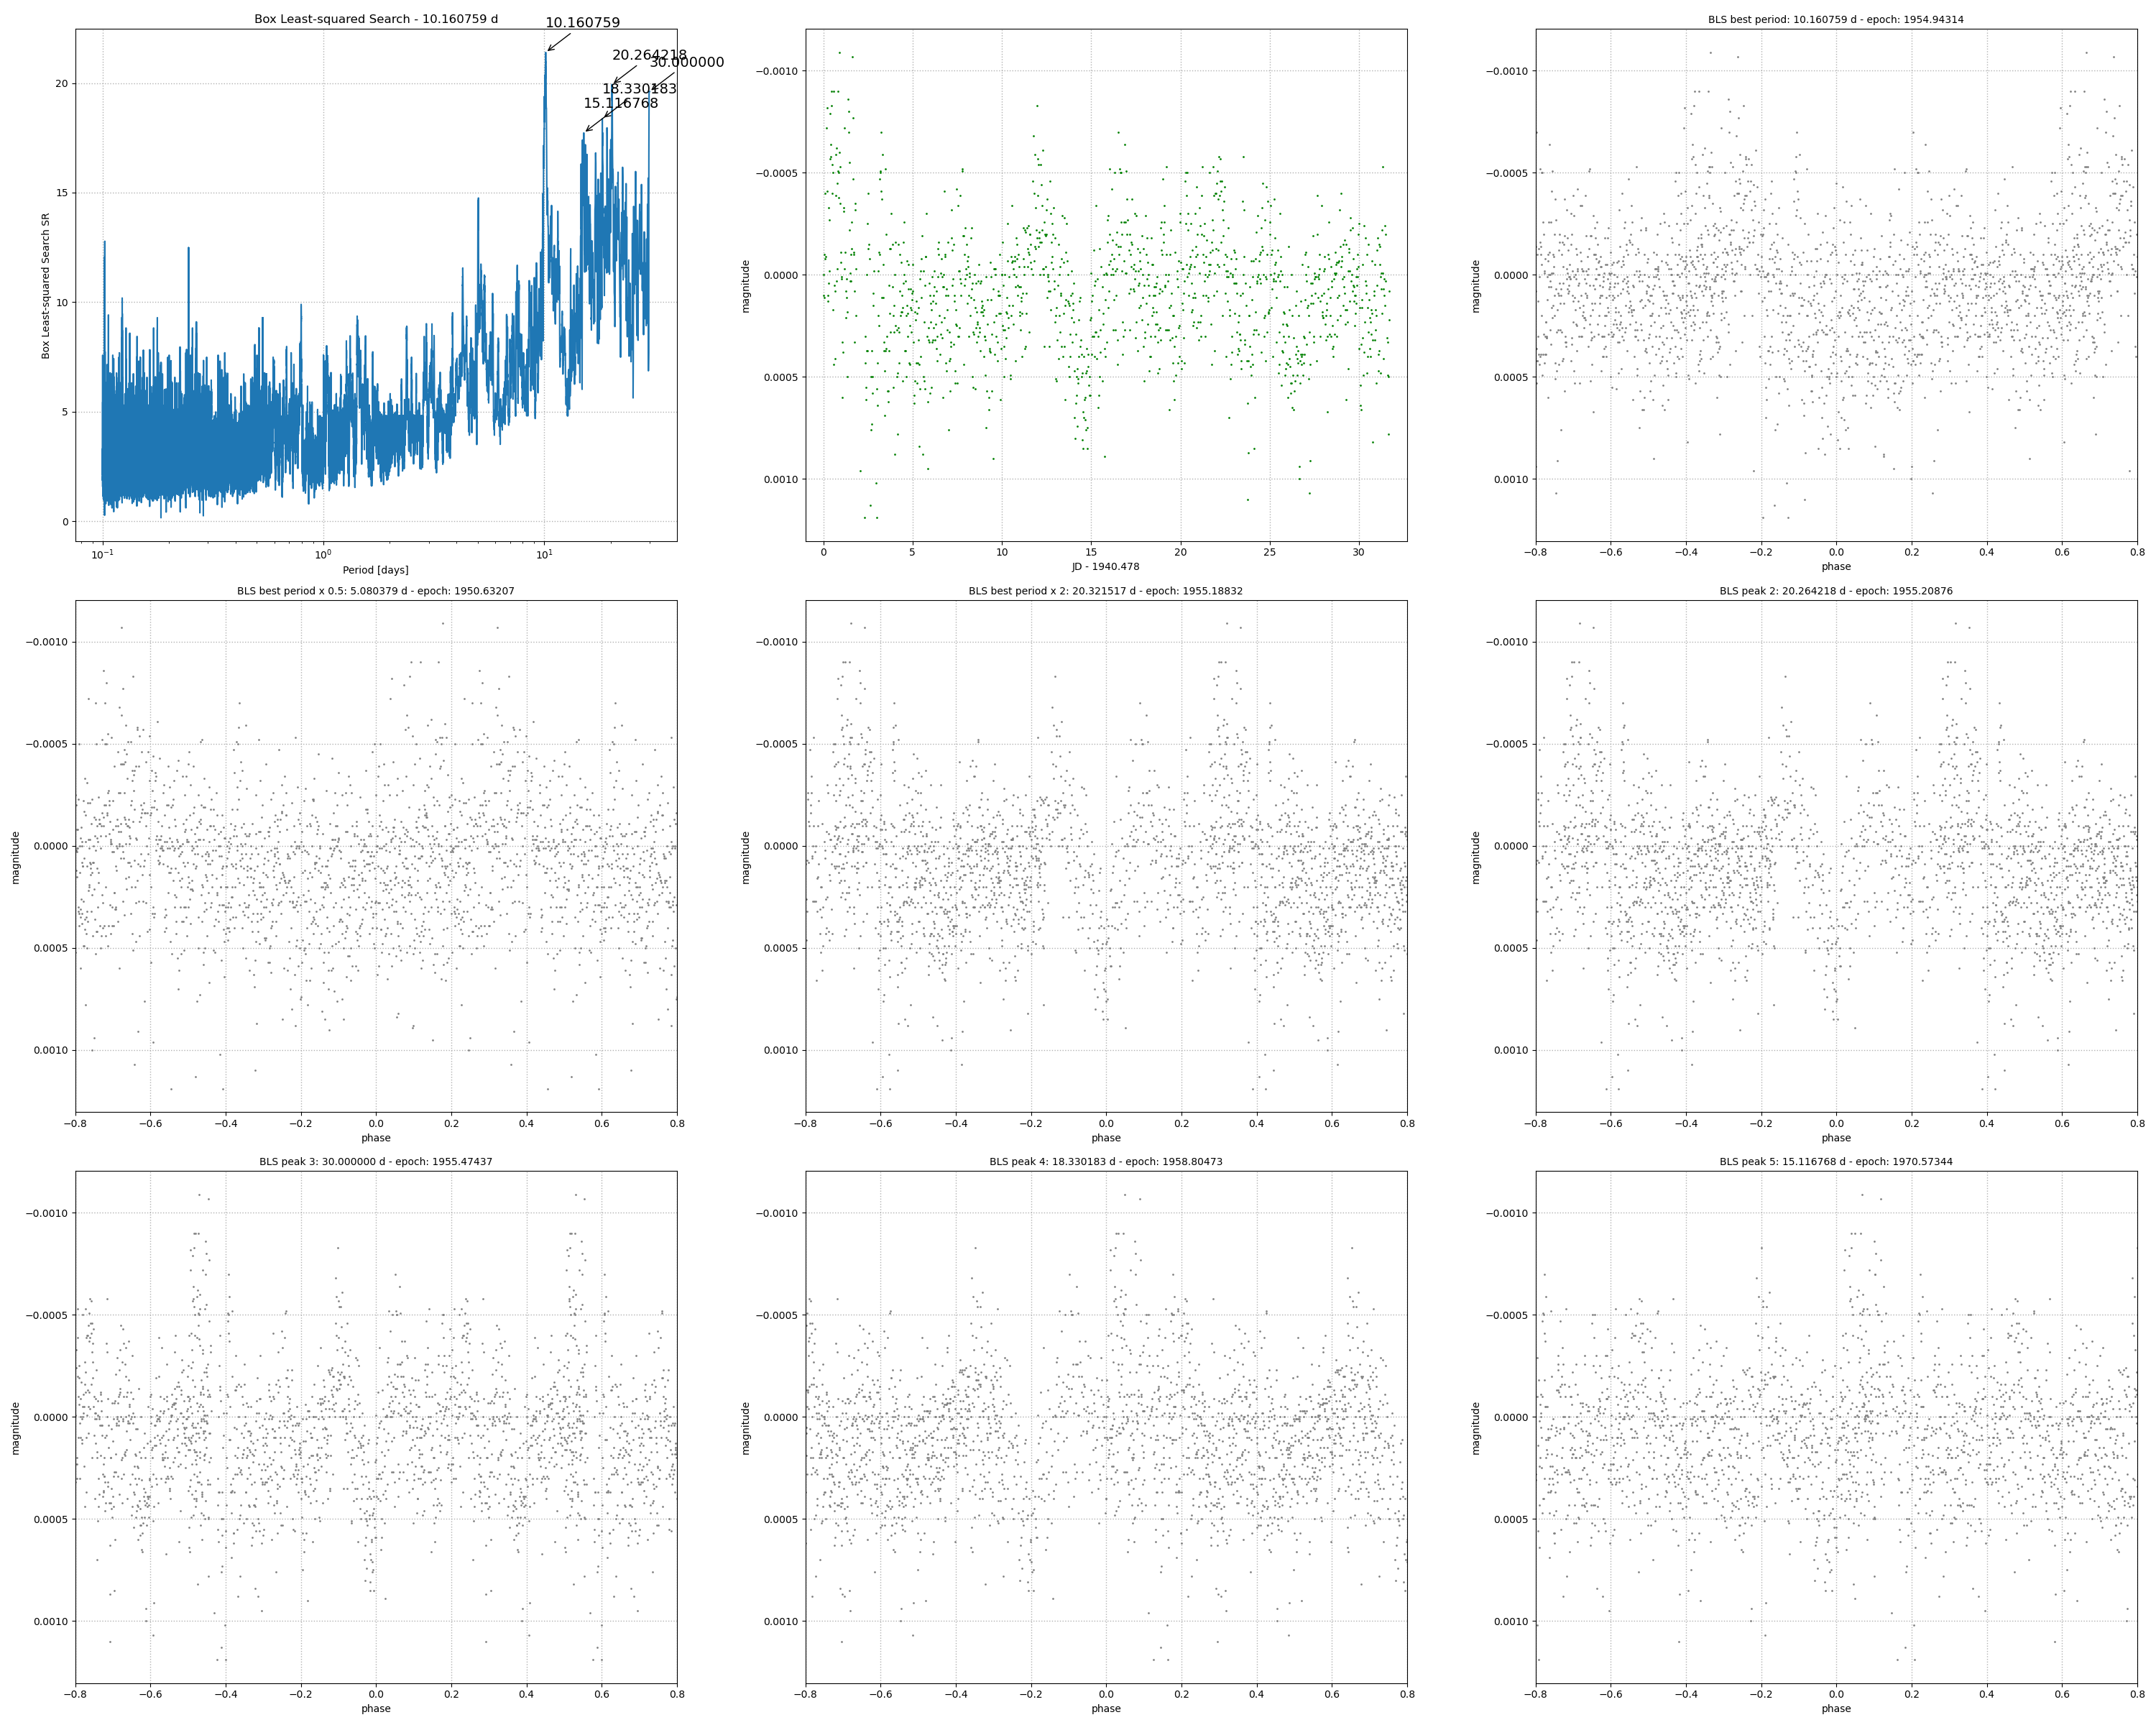

In [13]:
Image('0001357-checkplot-bls.png')

In [14]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200820 11:10:04 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200820 11:10:04 spdm:349] using 6 workers...


In [15]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200820 11:10:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 455.16705, reduced chisq = 0.33666
[I 200820 11:10:08 png:696] plotting phased LC with period 31.689566, epoch 1972.14669
[I 200820 11:10:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 443.51407, reduced chisq = 0.32804
[I 200820 11:10:08 png:696] plotting phased LC with period 15.844783, epoch 1972.14669
[I 200820 11:10:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 455.42306, reduced chisq = 0.33685
[I 200820 11:10:08 png:696] plotting phased LC with period 63.379131, epoch 1972.16712
[I 200820 11:10:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 448.97201, reduced chisq = 0.33208
[I 200820 11:10:08 png:696] plotting phased LC with period 12.188294, epoch 1954.92271
[I 200820 11:10:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 422.78413, reduced chisq = 0.31271
[I 200820 11:10:08 png:696] plotting phased LC with period 19.805978, epoch 1955.12703
[I 200820 11:10

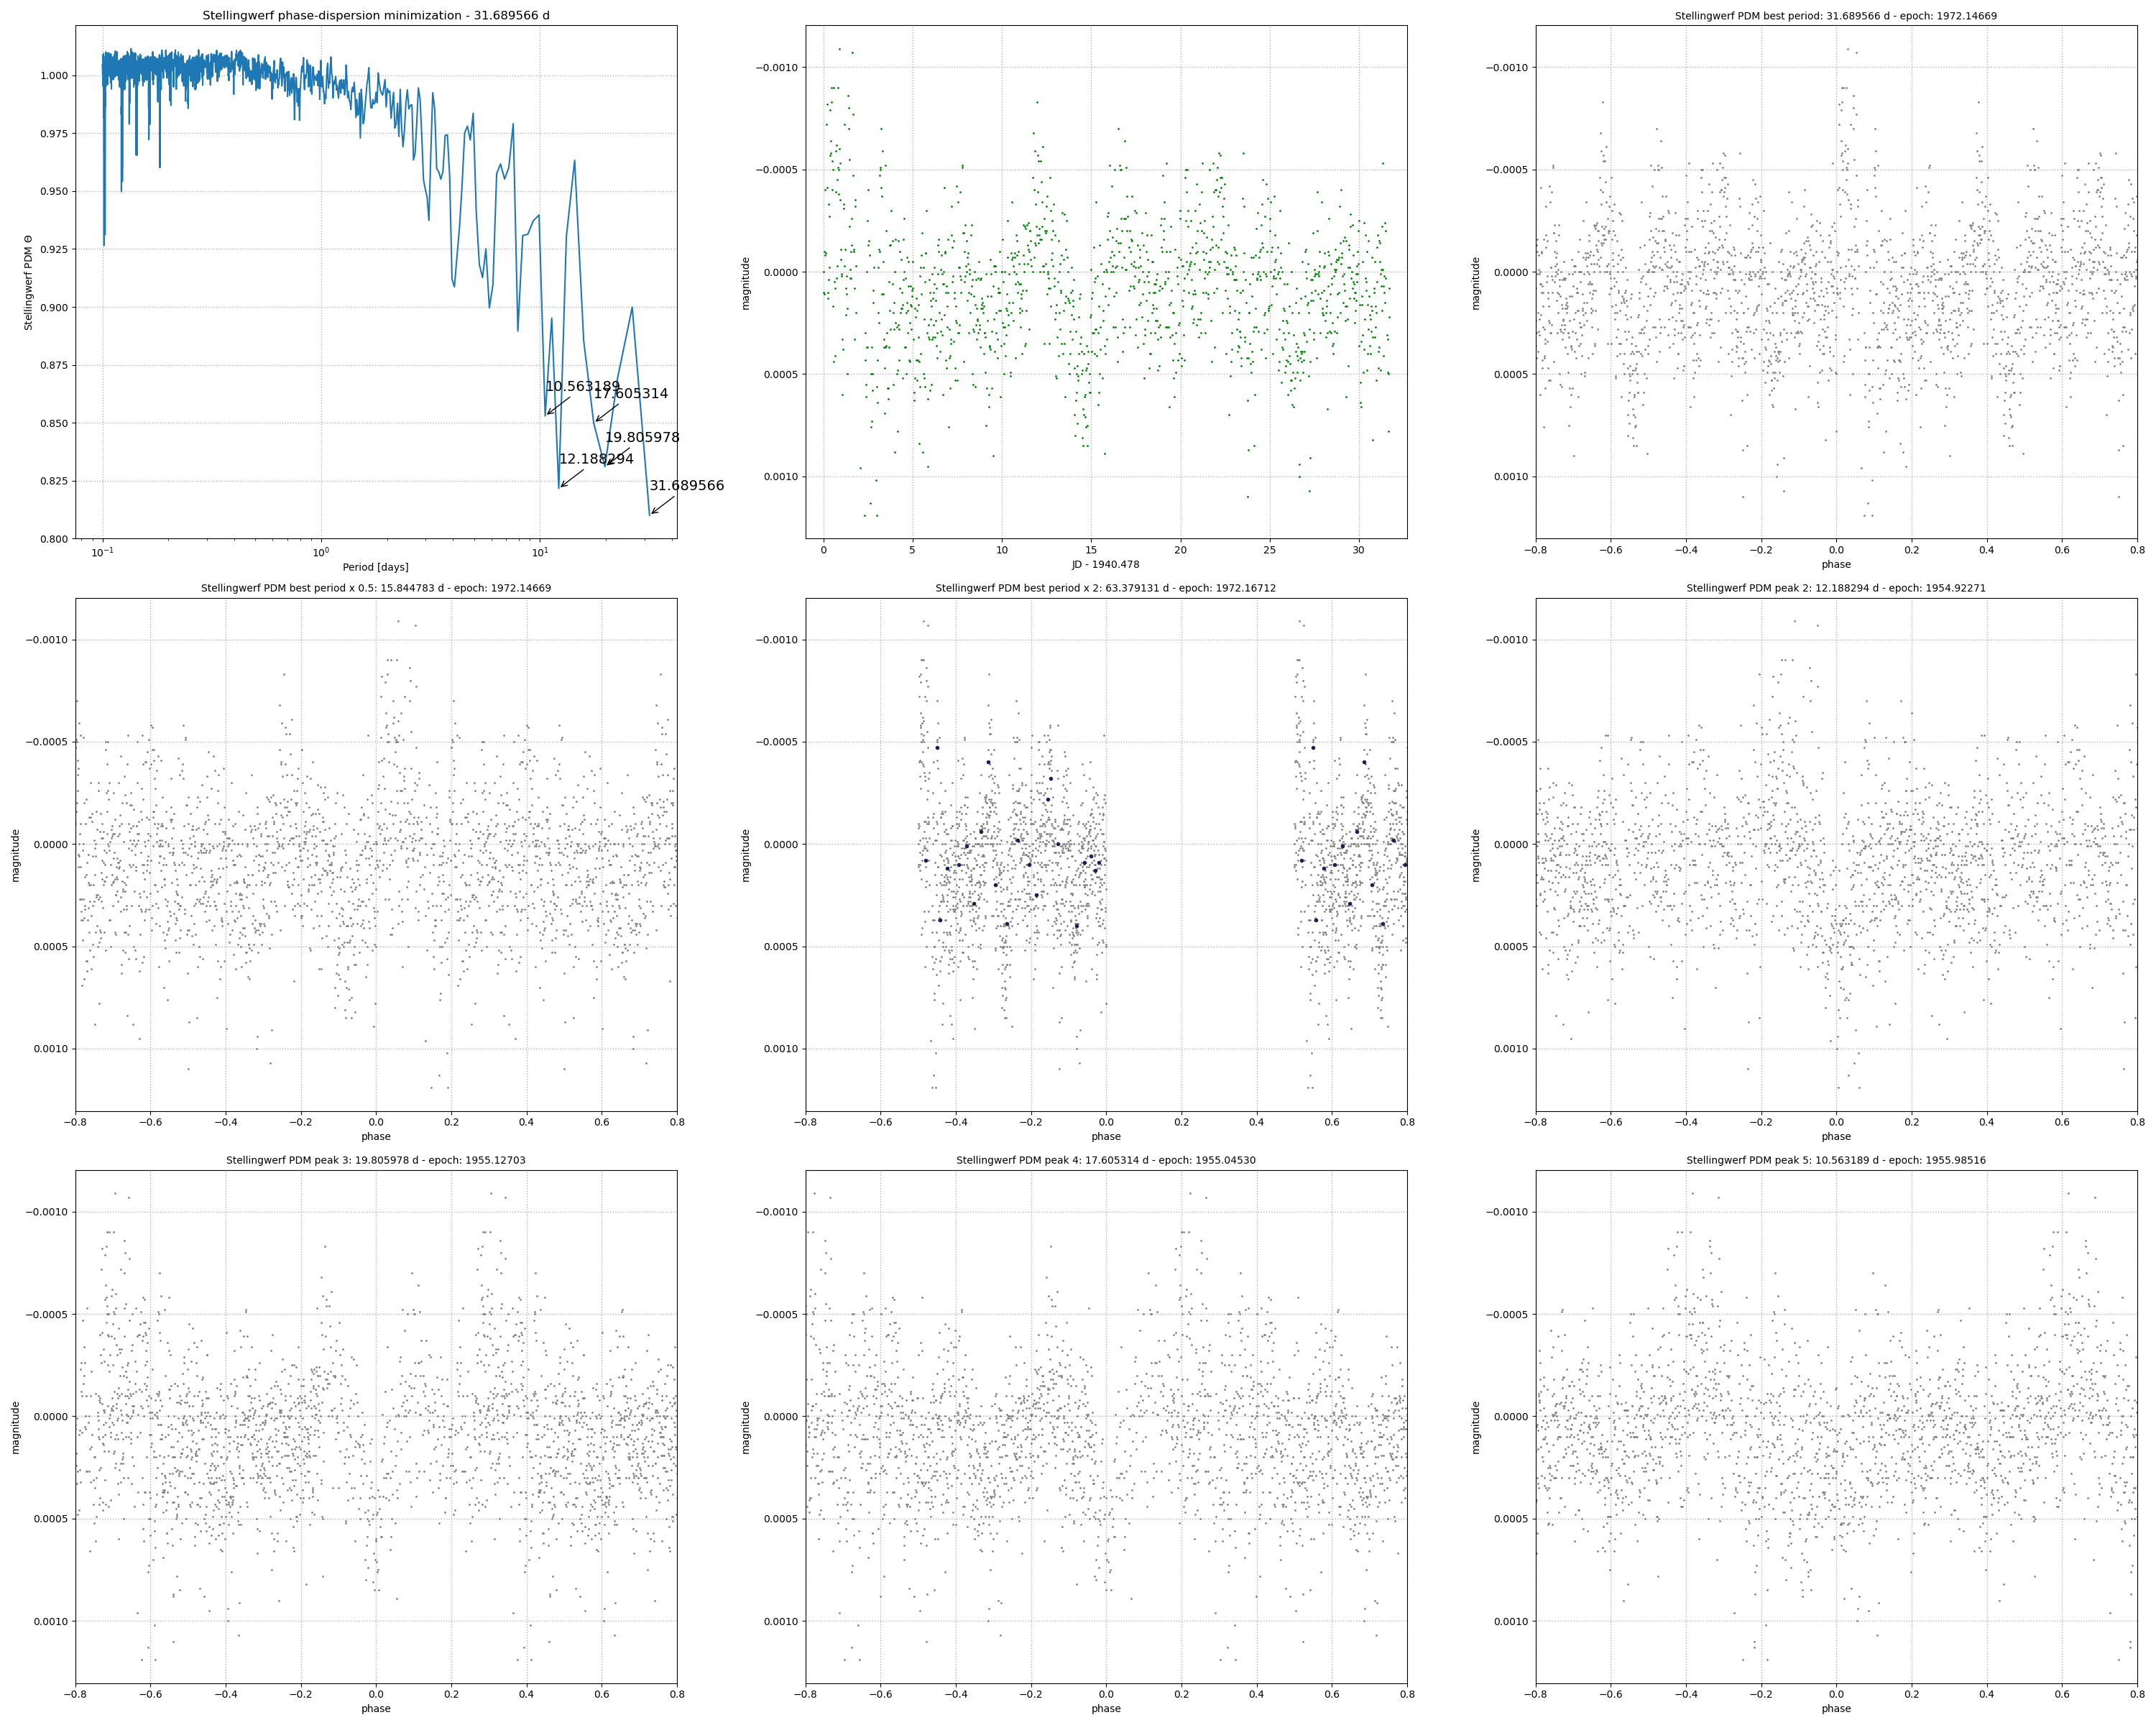

In [16]:
Image('0001357-checkplot-spdm.png')

In [17]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [31.689565579999904, 12.188294453846117, 19.805978487499942, 17.605314211111057, 10.563188526666634] (days)


In [18]:
df=pd.read_table('/Users/kornk/OneDrive/Documents/GitHub/UW-Lightcurves/K2Campaign0SuperStampLCs/photref.cat',sep='\s+')
HATID='HAT-264-0001357'
itemindex = np.where(df['HATID']==HATID)
print(itemindex[0])
RA=float(df.RA[itemindex[0]])
DEC=float(df.DEC[itemindex[0]])
print(RA,DEC)

[5901]
91.9458128 24.1925625


In [20]:
fileout='0001357.pkl'
cpf = checkplot.checkplot_pickle([glsp,spdm,bls],dates,fluxes,errs,outfile=fileout,objectinfo={'ra': RA,'decl': DEC})

[W 200820 11:11:29 pkl:604] adding a randomly generated objectid since none was provided in objectinfo dict
[I 200820 11:11:29 pkl_utils:415] adding in object information and finder chart for 9568b at RA: 91.946, DEC: 24.193
[I 200820 11:11:34 skyview:209] submitting stamp request for 91.9458, 24.1926, DSS2 Red, Linear, 300
[I 200820 11:11:38 skyview:233] getting https://skyview.gsfc.nasa.gov/tempspace/fits/skv27910948607791.fits
[I 200820 11:11:41 plotbase:964] fetched stamp successfully for (91.946, 24.193)
[W 200820 11:11:48 pkl_utils:765] pmRA not found in provided objectinfo dict, using value from GAIA
[W 200820 11:11:48 pkl_utils:783] pmDEC not found in provided objectinfo dict, using value from GAIA
[I 200820 11:11:54 mast:245] query successful. nmatches: 1
[W 200820 11:11:57 pkl:661] times is an astropy.table.Column object, changing to numpy array because of potential unpickling issues
[W 200820 11:11:57 pkl:666] mags is an astropy.table.Column object, changing to numpy array b

[I 200820 11:12:00 pkl_png:1076] checkplot pickle -> checkplot PNG: checkplot-pickle.png OK


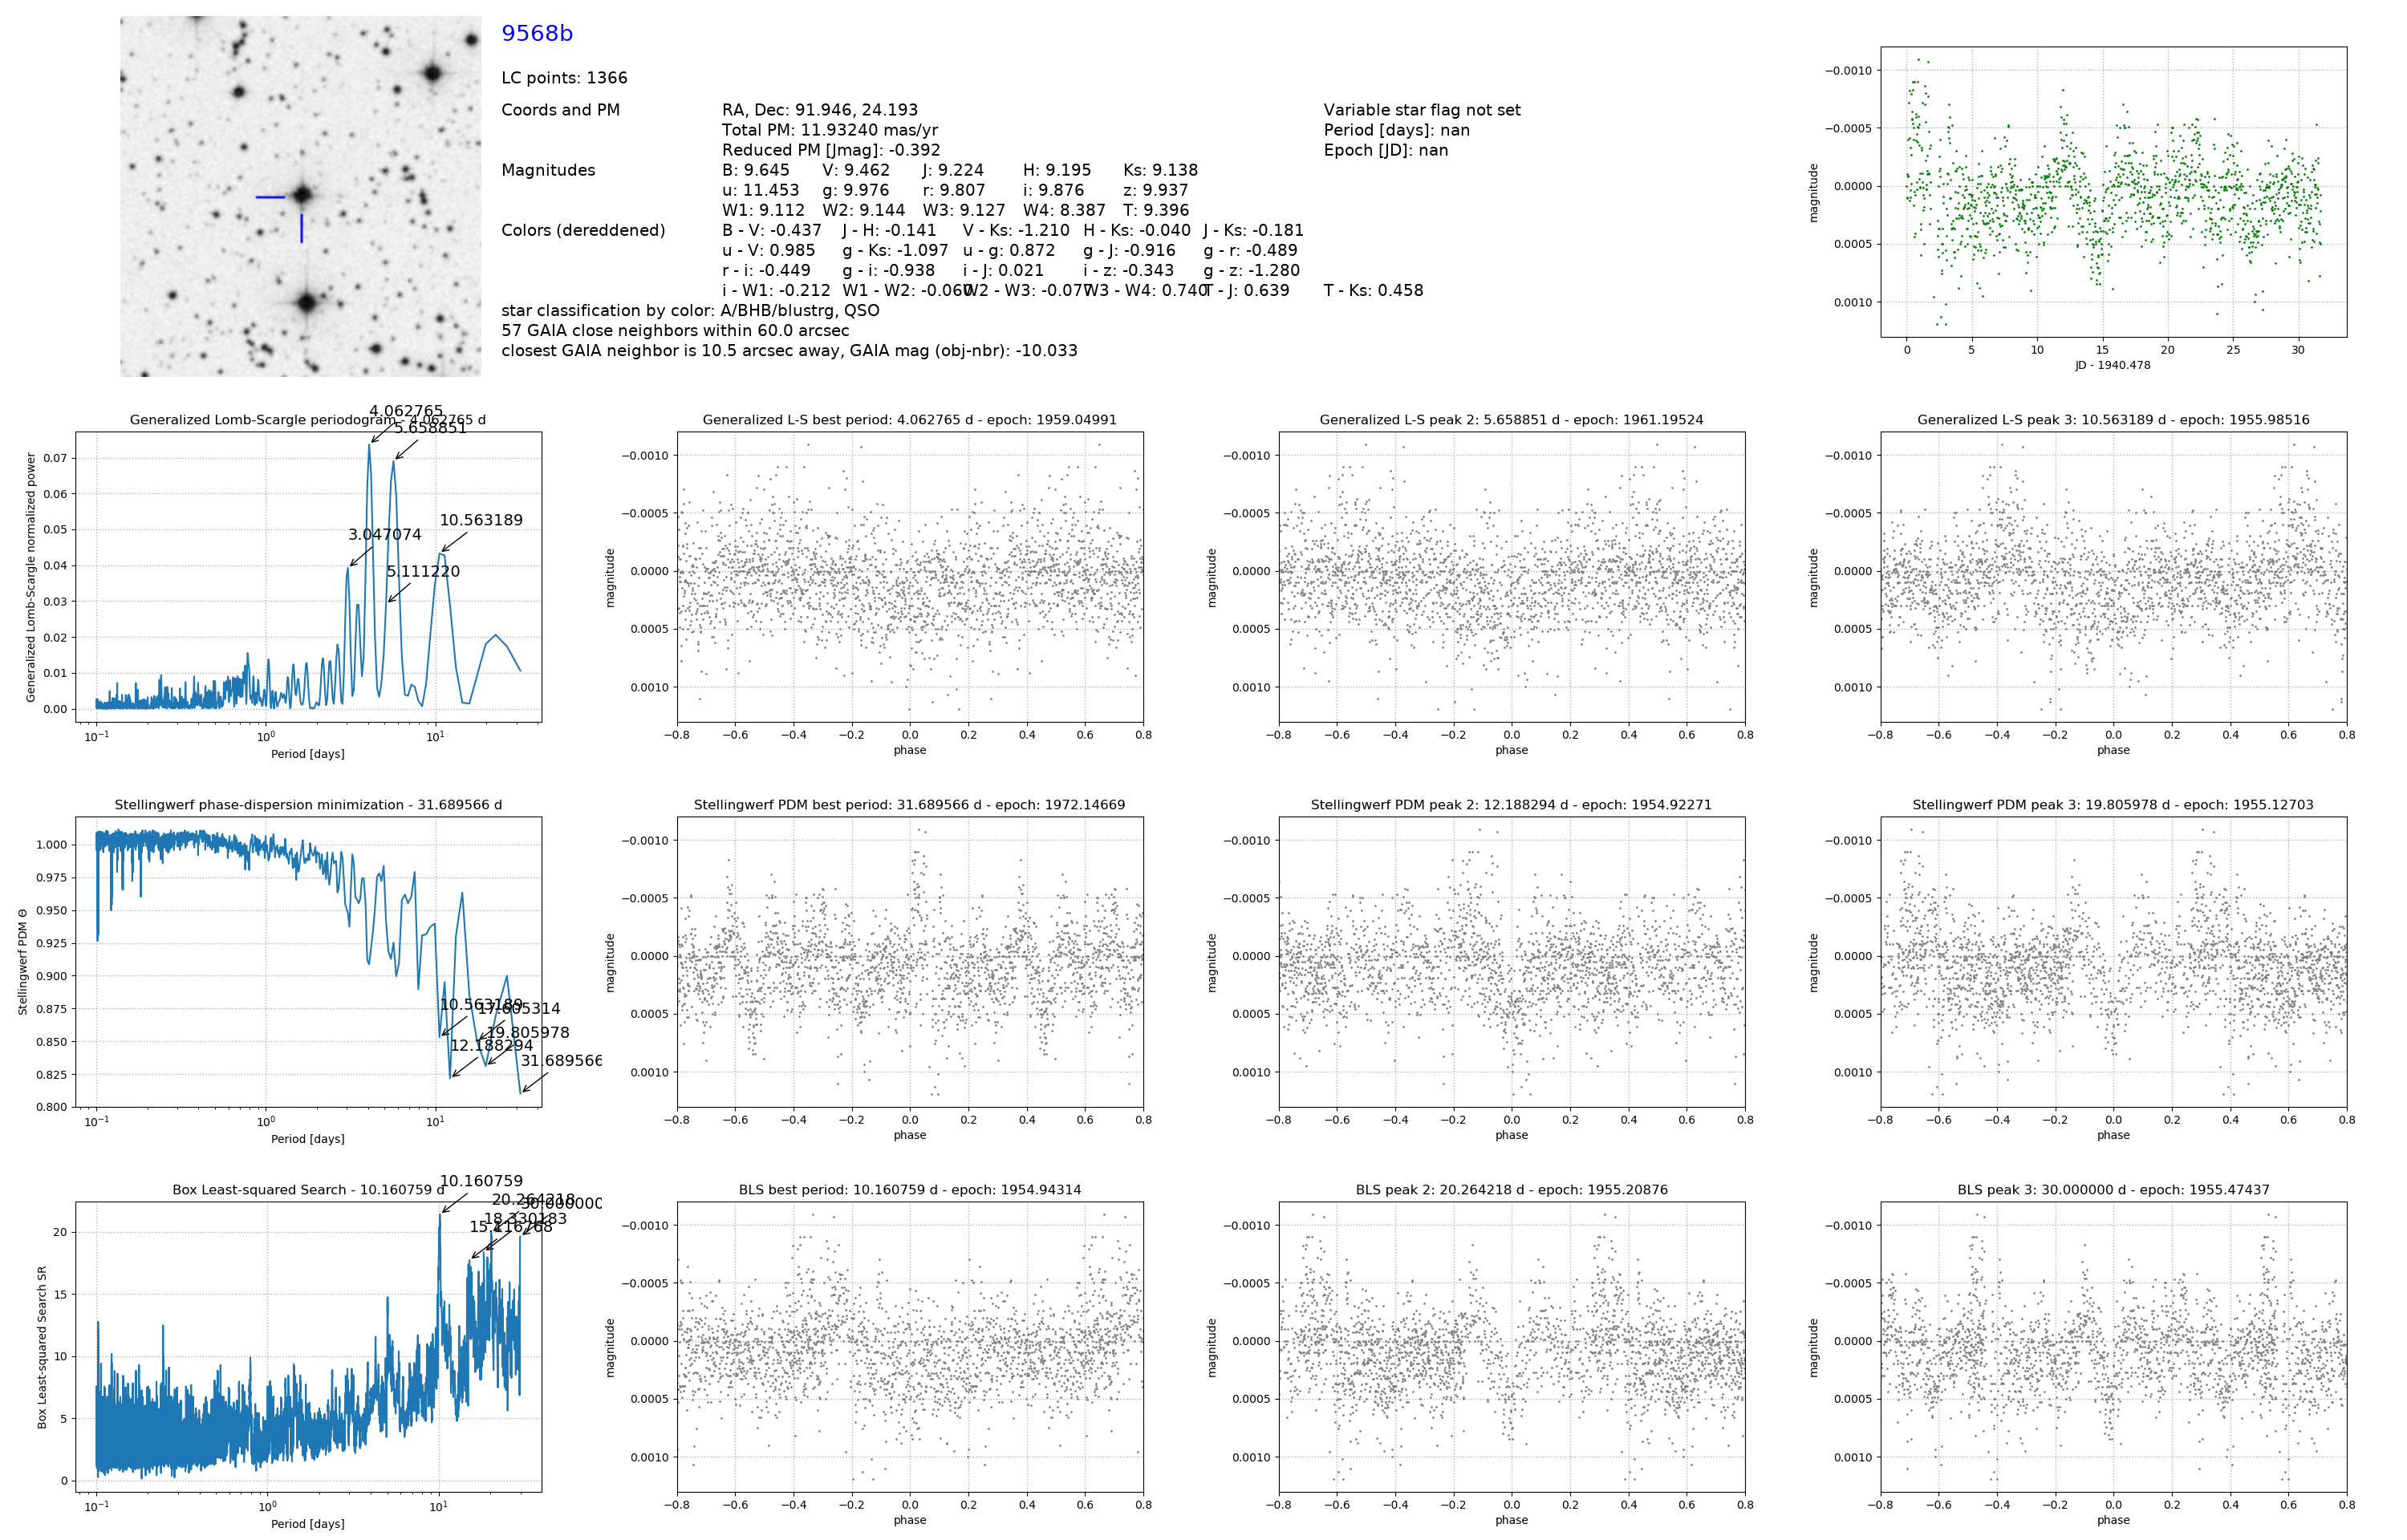

In [21]:
cpfpng = checkplot.checkplot_pickle_to_png(fileout, 'checkplot-pickle.png')
Image('checkplot-pickle.png')